# **Optimización de conjuntos de datos para ML**

## Autor

Manuel Gómez-Plana Rodríguez - 100472310

# **1. Introducción**
<a id="introduction"> </a>

Este *notebook* contiene toda la documentación con la realización de la práctica "Optimización de conjuntos de datos para ML" perteneciente a la asignatura Inteligencia Artificial de Inspiración Biológica del Máster Universitario en Ciencia y Tecnología Informática de la Universidad Carlos III de Madrid. Esta práctica consiste en emplear distintos algoritmos de IA con inspiración biológica con el fin de optimizar un conjunto de datos para mejorar los resultados obtenidos por un modelo base en una tarea supervisada. Para explicar el desarrollo llevado a cabo, este documento se estructura en los siguientes apartados:

1. [**Introducción**](#introduction): introducción al contexto de la práctica y del documento.
2. [**Datos**](#data): explicación del conjunto de datos a usar y cargado del mismo.
3. [**Modelo base**](#base-model): exploración y elección del modelo base a utilizar en la práctica.
    - 3.1. [**Regresión lineal**](#linear-regression): implementación mediante un modelo de regresión lineal. 
    - 3.2. [**Árboles de decisión**](#decision-trees): implementación mediante un modelo de árboles de decisión.
    - 3.3. [**SVR**](#SVR): implementación mediante un modelo de SVR.
    - 3.4. [**Elección del mejor modelo**](base-model-election): comparación y decisión del modelo base.
5. [**Desarrollo**](#development): exploración e implementación de las distintas técnicas de inspiración biológica para mejorar el conjunto de datos.
    - 4.1. [**Síntesis de atributos**](#synthesis): procesos relacionados con la creación de nuevos atributos.
    - 4.2. [**Eliminación de atributos**](#delete): procesos relacionados con la eliminación de atributos.
6. [**Resultados**](#results): análisis de los resultados obtenidos de manera global.
7. [**Conclusiones**](#conclusion): pensamientos finales sobre el desarrollo de la práctica.

Esta práctica se ha llevado a cabo empleando el lenguaje de programación `Python` y la librería de ML `scikit-learn`. Todas las librerías necesarias se importan a continuación:

In [8]:
import sklearn as sk             # Algoritmos de ML
import pandas as pd              # Análisis de datos
from time import time            # Medidas temporales
import matplotlib.pyplot as plt  # Representación gráfica

# **2. Datos**
<a id="data"></a>

El primer paso necesario en esta práctica es analizar los datos. El dataset utilizado en esta práctica para entrenar al modelo base es el presente en Aula Global, "Diabetes.csv". Para analizar este `csv`, se emplea la librería de Python `pandas`, mediante el siguiente código.:

In [2]:
data = pd.read_csv("Diabetes.csv", sep=",")
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Como se puede observar, el dataset contiene 442 filas y 11 columnas. Los atributos del mismo son:

- **age**: determina la edad de la persona.
- **sex**: determina el sexo de la persona.
- **bmi**: determina el índice de masa corporal de la persona.
- **bp**: determina la presión sanguínea de la persona.
- **s1-s6**: análisis sanguíneo de las personas, como explica [Microsoft](https://learn.microsoft.com/es-es/azure/open-datasets/dataset-diabetes?tabs=azureml-opendatasets)
- **target**: índice que determina el avance de la diabetes 1 año después de la medida, como explica [Microsoft](https://learn.microsoft.com/es-es/azure/open-datasets/dataset-diabetes?tabs=azureml-opendatasets). Este atributo es la variable objetivo que buscará optimizar el modelo de ML.

Aparentemente, todos los atributos menos el objetivo han sido normalizados. Esto se observa mejor en el siguiente código:

In [3]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Con el siguiente código, se puede observar que los datos no contienen valores nulos, y que no hay que realizar ninguna tarea de limpiado de datos previa al modelo.

In [4]:
print(data.isnull().any()) # Checks if any column contains NaN

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool


Una vez analizados los datos a emplear, se procede a buscar el modelo base adecuado

# **3. Modelo base**
<a id="base-model"></a>

Este apartado contiene una búsqueda del modelo base adecuado a emplear en la práctica. Existe una serie de características que el modelo base ha de cumplir:

- El modelo base debe ser capaz de ser entrenado para una tarea de regresión.
- Es favorable que el modelo base pueda ser entrenado en un tiempo relativamente corto, ya que se realizarán muchos entrenamientos del mismo.
- Es favorable que el modelo base no proporcione un resultado excesivamente bueno, ya que el objetivo de la práctica es mejorar los resultados simplemente mediante algoritmos aplicados a los datos.

Teniendo estas características en cuenta, se ha decidido escoger 3 modelos base posibles, que serán evaluados para escoger el que mejor se adecúe a estas restricciones. Estos modelos son: regesión lineal, árboles de decisión y SVR (SVMs aplicados regresión). Antes de entrenar los modelos, se hace la división de los datos entre *train* y *test* mediante el siguiente código:

In [9]:
train, test = sk.model_selection.train_test_split(data, shuffle=False, random_state=42, test_size=0.2)

# Datos para el entrenamiento
X_train = train.drop(["target"], axis="columns")
Y_train = train[["target"]]

# Datos para la validación
X_test = test.drop(["target"], axis="columns")
Y_test = test[["target"]]

Para validar los modelos, se realizará un análisis de los resultados mediante: el MAE, el MSE y el RSME; importados en el siguiente código:

In [12]:
from sklearn.metrics import mean_absolute_error    # MAE
from sklearn.metrics import mean_squared_error     # MSE
import numpy as np                                 # Usado para calcular el RSME

## **3.1. Regresión lineal**
<a id="linear-regression"></a>

El primer modelo a entrenar es una regresión lineal. Para construir el modelo, se ha empleado la librería `scikit-learn` y se han obtenido las medidas temporales de su entrenamiento mediante la librería `time` de Python.

In [18]:
# Creación del modelo
linear_regressor = sk.linear_model.LinearRegression()
linear_regressor

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Entrenamiento del modelo
start = time()
linear_regressor.fit(X_train, Y_train)
end = time()

# Cálculo del tiempo empleado en el entrenamiento
lr_time = end - start

# Uso del modelo
y_pred = linear_regressor.predict(X_test)

# Cálculo de los errores
lr_mae = mean_absolute_error(Y_test, y_pred)
lr_mse = mean_squared_error(Y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

# Impresión de los resultados
print("====== Regresión Lineal ======\n")
print(f"Tiempo de entrenamiento: {lr_time} segundos\n")
print(f"MAE={lr_mae}")
print(f"MSE={lr_mse}")
print(f"RMSE={lr_rmse}")

====== Regresión Lineal ======

Tiempo de entrenamiento: 0.0035729408264160156 segundos

MAE=42.54797864748968
MSE=2929.895291318207
RMSE=54.1285071964691


Los resultados obtenidos se observan mejor mediante el siguiente gráfico generado con la librería `MatPlotLib`:

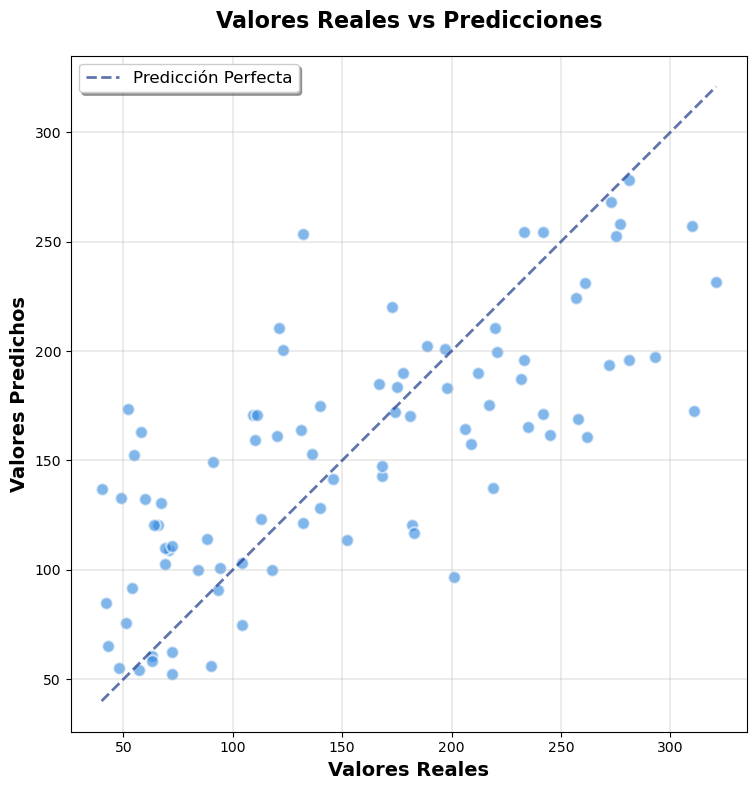

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Y_test, y_pred, s=80, alpha=0.6, color='#2E86DE', 
          edgecolors='white', linewidth=1.5)

# Línea de predicción perfecta (y=x)
min_val = min(Y_test.min().item(), y_pred.min().item())
max_val = max(Y_test.max().item(), y_pred.max().item())
ax.plot([min_val, max_val], [min_val, max_val], '--', 
        linewidth=2, label='Predicción Perfecta', alpha=0.7, color="#1E3A8A")

ax.set_xlabel('Valores Reales', fontsize=14, fontweight='bold')
ax.set_ylabel('Valores Predichos', fontsize=14, fontweight='bold')
ax.set_title('Valores Reales vs Predicciones', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.2)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## **3.2. Árboles de decisión**
<a id="decision-trees"></a>

El segundo modelo a probar son los árboles de decisión. De la misma manera que con el anterior, se emplean las librerías `scikit-learn` y `time` para entrenar y obtener los resultados temporales del modelo, respectivamente.

In [11]:
# Creación del modelo
decision_tree = sk.tree.DecisionTreeRegressor()
decision_tree

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
# Entrenamiento del modelo
start = time()
decision_tree.fit(X_train, Y_train)
end = time()

# Cálculo del tiempo empleado en el entrenamiento
dt_time = end - start

# Uso del modelo
y_pred = decision_tree.predict(X_test)

# Cálculo de los errores
dt_mae = mean_absolute_error(Y_test, y_pred)
dt_mse = mean_squared_error(Y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)

# Impresión de los resultados
print("====== Árbol de decisión ======\n")
print(f"Tiempo de entrenamiento: {dt_time} segundos\n")
print(f"MAE={dt_mae}")
print(f"MSE={dt_mse}")
print(f"RMSE={dt_rmse}")

====== Árbol de decisión ======

Tiempo de entrenamiento: 0.004913330078125 segundos

MAE=69.06306306306307
MSE=7750.144144144144
RMSE=88.03490298821339


Como se puede observar, el tiempo empleado en el entrenamiento es prácticamente igual al de la regresión lineal, si bien los errores son mayores. Los resultados obtenidos se observan mejor mediante el siguiente gráfico generado con la librería `MatPlotLib`:

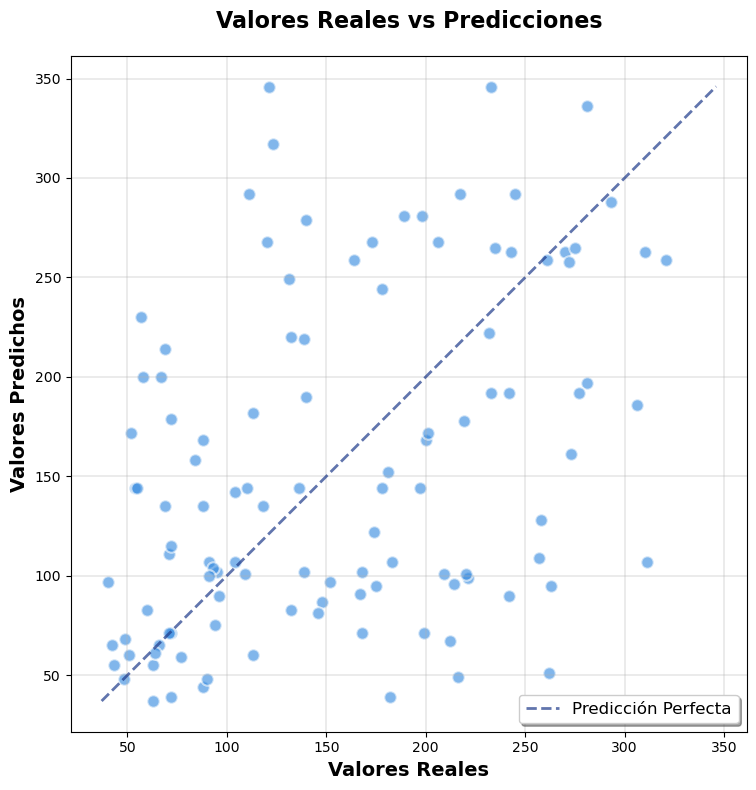

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Y_test, y_pred, s=80, alpha=0.6, color='#2E86DE', 
          edgecolors='white', linewidth=1.5)

# Línea de predicción perfecta (y=x)
min_val = min(Y_test.min().item(), y_pred.min().item())
max_val = max(Y_test.max().item(), y_pred.max().item())
ax.plot([min_val, max_val], [min_val, max_val], '--', 
        linewidth=2, label='Predicción Perfecta', alpha=0.7, color="#1E3A8A")

ax.set_xlabel('Valores Reales', fontsize=14, fontweight='bold')
ax.set_ylabel('Valores Predichos', fontsize=14, fontweight='bold')
ax.set_title('Valores Reales vs Predicciones', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.2)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## **3.3. SVR**
<a id="SVR"></a>

El tercer modelo a probar son los SVR, una especificación de las SVM que permite emplearlas para un problema de regresión. De la misma manera que con los modelos anteriores, se emplean las librerías `scikit-learn` y `time` para entrenar y obtener los resultados temporales del modelo, respectivamente.

In [15]:
# Creación del modelo
svr = sk.svm.SVR()
svr

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [26]:
# Entrenamiento del modelo
start = time()
svr.fit(X_train, Y_train.values.ravel())
end = time()

# Cálculo del tiempo empleado en el entrenamiento
svr_time = end - start

# Uso del modelo
y_pred = svr.predict(X_test)

# Cálculo de los errores
svr_mae = mean_absolute_error(Y_test, y_pred)
svr_mse = mean_squared_error(Y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)

# Impresión de los resultados
print("====== SVR ======\n")
print(f"Tiempo de entrenamiento: {svr_time} segundos\n")
print(f"MAE={svr_mae}")
print(f"MSE={svr_mse}")
print(f"RMSE={svr_rmse}")

====== SVR ======

Tiempo de entrenamiento: 0.011753082275390625 segundos

MAE=61.73818703582849
MSE=5272.198646633668
RMSE=72.6099073586633


Como se puede observar, el tiempo empleado en el entrenamiento es algo superior al resto de modelos, si bien es un aumento despreciable. Los resultados obtenidos se observan mejor mediante el siguiente gráfico generado con la librería `MatPlotLib`:

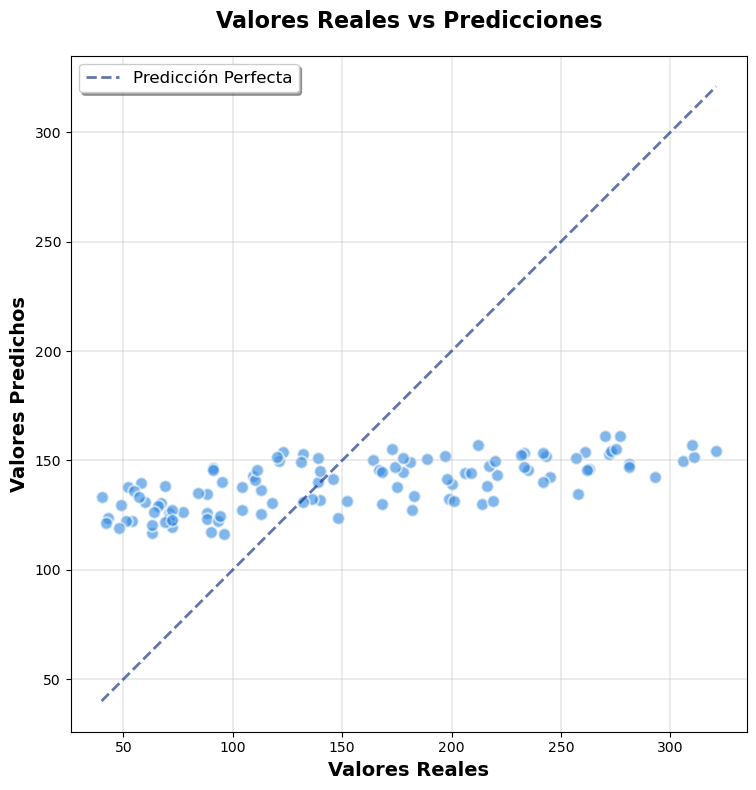

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Y_test, y_pred, s=80, alpha=0.6, color='#2E86DE', 
          edgecolors='white', linewidth=1.5)

# Línea de predicción perfecta (y=x)
min_val = min(Y_test.min().item(), y_pred.min().item())
max_val = max(Y_test.max().item(), y_pred.max().item())
ax.plot([min_val, max_val], [min_val, max_val], '--', 
        linewidth=2, label='Predicción Perfecta', alpha=0.7, color="#1E3A8A")

ax.set_xlabel('Valores Reales', fontsize=14, fontweight='bold')
ax.set_ylabel('Valores Predichos', fontsize=14, fontweight='bold')
ax.set_title('Valores Reales vs Predicciones', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.2)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

Pese a que los errores no sean tan distintos al resto de modelos, los resultados obtenidos distan mucho a los de los primeros modelos, ya que el SVR siempre predice valores parecidos, por lo que no se parecen realmente a los reales. Si bien esto se podría mermar con una optimización de hiperparámetros, se cree que el objetivo de la práctica no es mejorar el modelo sino los datos, por lo que no se realizará dicha optimización.

## **3.4. Elección del mejor modelo**
<a id="base-model-election"></a>

Una vez que se han presentado los tres modelos base y sus resultados, es momento de elegir el que se va a emplear. Para ello, es necesario compararlos en base a las tres métricas establecidas anteriormente. Ya que todos pueden ser usados para regresión, se tendrá solamente en cuenta el tiempo de entrenamiento y los resultados obtenidos. Para realizarlo de manera gráfica, se presenta el siguiente código:

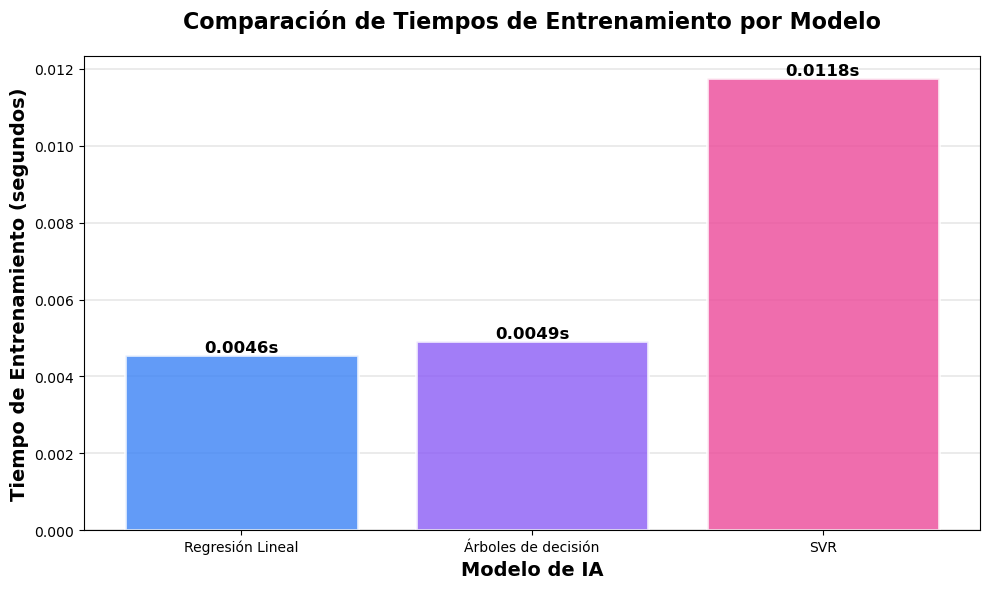

In [28]:
# Datos
modelos = ["Regresión Lineal", "Árboles de decisión", "SVR"]
tiempos = [lr_time, dt_time, svr_time]
colores = ['#3B82F6', '#8B5CF6', '#EC4899']  # Azul, Púrpura, Rosa

# Creación del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(modelos, tiempos, color=colores, alpha=0.8, 
              edgecolor='white', linewidth=2)

# Labels y título
ax.set_xlabel('Modelo de IA', fontsize=14, fontweight='bold')
ax.set_ylabel('Tiempo de Entrenamiento (segundos)', fontsize=14, fontweight='bold')
ax.set_title('Comparación de Tiempos de Entrenamiento por Modelo', 
             fontsize=16, fontweight='bold', pad=20)

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}s',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grid y estilo
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=1.2)
ax.set_axisbelow(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

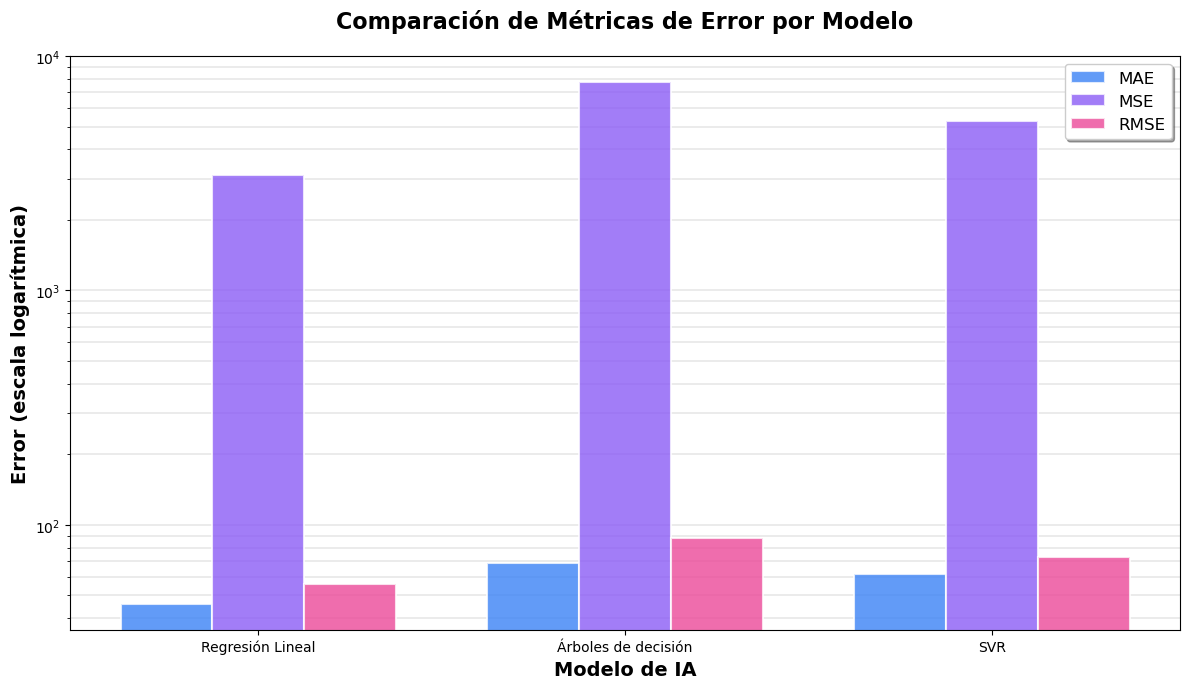

In [29]:
# Datos
modelos = ["Regresión Lineal", "Árboles de decisión", "SVR"]
mae_valores = [lr_mae, dt_mae, svr_mae]
mse_valores = [lr_mse, dt_mse, svr_mse]
rmse_valores = [lr_rmse, dt_rmse, svr_rmse]

# Configuración de las barras
x = np.arange(len(modelos))
width = 0.25

# Colores bonitos para cada métrica
colores = ['#3B82F6', '#8B5CF6', '#EC4899']  # Azul, Púrpura, Rosa

# Creación del gráfico
fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width, mae_valores, width, label='MAE', 
               color=colores[0], alpha=0.8, edgecolor='white', linewidth=1.5)
bars2 = ax.bar(x, mse_valores, width, label='MSE', 
               color=colores[1], alpha=0.8, edgecolor='white', linewidth=1.5)
bars3 = ax.bar(x + width, rmse_valores, width, label='RMSE', 
               color=colores[2], alpha=0.8, edgecolor='white', linewidth=1.5)

# Escala logarítmica en Y para manejar diferentes magnitudes
ax.set_yscale('log')

# Labels y título
ax.set_xlabel('Modelo de IA', fontsize=14, fontweight='bold')
ax.set_ylabel('Error (escala logarítmica)', fontsize=14, fontweight='bold')
ax.set_title('Comparación de Métricas de Error por Modelo', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Leyenda
ax.legend(fontsize=12, frameon=True, shadow=True, fancybox=True)

# Grid
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=1.2, which='both')
ax.set_axisbelow(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

Como se puede observar, el SVR es el modelo que más tiempo de entrenamiento emplea. Si bien no es una diferencia significativa, esto se suma a que los resultados predichos no siguen la tendencia de los reales y arreglar esto es una tarea que se escapa al alcance de esta práctica. Estos motivos son suficientes para no considerar el SVR como modelo base.

Tanto el modelo de regresión lineal como los árboles de decisión tienen resultados muy parecidos. Ante esto, se ha decidio emplear la regresión lineal como modelo base, ya que tiene mejores resultados en el tiempo de entrenamiento, algo realmente crucial para el desarrollo de la práctica.

# **4. Desarrollo**
<a id="development"></a>

Una vez que se ha elegido la regresión lineal como modelo base, es momento de aplicar los algoritmos bio-inspirados en los datos para mejorar sus resultados. Así, este apartado se divide en dos sub-apartados, uno que describe la síntesis de atributos y otro que describe la selección de atributos.

## **4.1. Síntesis de atributos**
<a id="synthesis"></a>

La síntesis de atributos consiste en generar atributos nuevos a partir de los ya presentes aplicando alguna función que los combine. Siguiendo esta descripción, la técnica que mejor se adecúa a este caso es la **Programación Genética**, ya que permite realizar combinaciones de los atributos para introducir uno nuevo. Para poder aplicar esta técnica, se emplea la librería `DEAP` de Python, la cual permite usar algoritmos bio-inspirados. Al usar librerías específicas, se proporciona el siguiente código de importado:

In [ ]:
import operator
import math
import random
import numpy as np
import pandas as pd
from deap import base, creator, tools, gp, algorithms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Al usar operaciones que pueden causar errores, como divisiones, al dividir entre 0; o raíces cuadradas, al hacerlas sobre números negativos; se proporciona las siguientes funciones que definen estas operaciones protegidas ante casos problemáticos:

In [3]:
def protectedDiv(left, right):
    """División protegida para evitar división por cero"""
    try:
        return left / right if abs(right) > 1e-6 else 1
    except (ZeroDivisionError, OverflowError):
        return 1

def protectedSqrt(x):
    """Raíz cuadrada protegida"""
    try:
        return math.sqrt(abs(x))
    except (ValueError, OverflowError):
        return 1

def protectedLog(x):
    """Logaritmo protegido"""
    try:
        return math.log(abs(x)) if abs(x) > 1e-6 else 0
    except (ValueError, OverflowError):
        return 0

def protectedExp(x):
    """Exponencial protegida"""
    try:
        result = math.exp(x)
        return result if abs(result) < 1e10 else (1e10 if x > 0 else -1e10)
    except (OverflowError, ValueError):
        return 1e10 if x > 0 else -1e10


Una vez que se han definido los operadores, se puede definir una clase para entrenar las regresiones lineales con los datos modificados, es decir, aquellos a los que se les ha añadido la columna definida por el algoritmo genético. Este código se define en una clase que cuenta con los siguientes parámetros:

- **population_size**: tamaño de la población.
- **generations**: número de generaciones del algoritmo.
- **crossover_prob**: número que define la probabilidad de cruce.
- **mutation_prob**: número que define la probabilidad de mutación.
- **tournament_size**: número que define el tamaño de los torneos para realizar la selección para el cruzamiento.
- **max_tree_depth**: número que define la profundidad máxima de los árboles generados.
- **test_size**: proporción de los datos que se usarán para la validación.
- **random_state**: semilla aleatoria.

Adicionalmente, se definen una serie de parámetros de la clase que se usan para el entrenamiento y que el usuario no puede definir. Tras esto, se definen una serie de funciones que se encargan de realizar el proceso de entrenamiento. Estas son:

- **_setup_primitive_set**: configura el conjunto de primitiva, es decir, operadores y constantes, los nombres de las columnas; que se usarán en la generación de los árboles. También se añaden constantes efímeras aleatorias, que se usan para añadir variabilidad a los árboles y a los resultados.
- **_setup_deap**: inicializa todo aquello relacionado con el algoritmo de programación genética, como la función de evaluación (definida en otro método), los operadores genéticos (mutación, selección, sobrecruzamiento...), el torneo de selección...
- **_evaluate_individual**: esta es la función que se encarga de evaluar un individuo. En este caso, el individuo, definido como el árbol de programación genética, se aplica a cada instancia del dataset original generando una nueva columna con el valor que devuelve este árbol. Luego, se entrena una regresión lineal con los datos modificados, tras lo que se devuelve el MAE como resultado de la evaluación, siempre buscando minimizarlo.
- **fit**: función que se encarga de inicializar la población, ejecutar el modelo de programación genética e imprimir los resultados del mejor árbol. 
- **transform**: función que se encarga de aplicar el mejor individuo (árbol) a los datos para transformar el dataset.
- **fit_transform**: llama a fit y a transform de manera conjunta.

Todo el código se ve reflejado en el siguiente bloque:

In [23]:
class GeneticProgrammingRegressor:

    # Método init con valores default
    def __init__(self, population_size=300, generations=40, crossover_prob=0.5, mutation_prob=0.2, 
                 tournament_size=3, max_tree_depth=17, test_size=0.2, random_state=42):

        self.population_size = population_size
        self.generations = generations
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.tournament_size = tournament_size
        self.max_tree_depth = max_tree_depth
        self.test_size = test_size
        self.random_state = random_state
        
        self.feature_names = None
        self.target_name = None
        self.pset = None
        self.toolbox = None
        self.best_individual = None
        self.hof = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def _setup_primitive_set(self, feature_names):
        
        # Crear primitive set con tantos argumentos como features
        pset = gp.PrimitiveSet("MAIN", len(feature_names))
        
        # Renombrar argumentos con los nombres de las columnas
        for i, name in enumerate(feature_names):
            pset.renameArguments(**{f'ARG{i}': name})
        
        # Agregar operadores aritméticos
        pset.addPrimitive(operator.add, 2, name='add')
        pset.addPrimitive(operator.sub, 2, name='sub')
        pset.addPrimitive(operator.mul, 2, name='mul')
        pset.addPrimitive(protectedDiv, 2, name='div')
        
        # Agregar funciones matemáticas
        pset.addPrimitive(operator.neg, 1, name='neg')
        pset.addPrimitive(protectedSqrt, 1, name='sqrt')
        pset.addPrimitive(protectedLog, 1, name='log')
        pset.addPrimitive(protectedExp, 1, name='exp')
        pset.addPrimitive(math.sin, 1, name='sin')
        pset.addPrimitive(math.cos, 1, name='cos')
        
        # Agregar constantes efímeras
        pset.addEphemeralConstant("random", lambda: random.uniform(-1, 1))
        
        return pset
    
    def _setup_deap(self):
        
        # Limpiar creator si ya existe
        if hasattr(creator, "FitnessMin"):
            del creator.FitnessMin
        if hasattr(creator, "Individual"):
            del creator.Individual
            
        # Crear tipos
        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
        creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
        
        # Configurar toolbox
        toolbox = base.Toolbox()
        
        # Generación de individuos
        toolbox.register("expr", gp.genHalfAndHalf, pset=self.pset, min_=1, max_=2)
        toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        
        # Compilación
        toolbox.register("compile", gp.compile, pset=self.pset)
        
        # Función de evaluación
        toolbox.register("evaluate", self._evaluate_individual)
        
        # Operadores genéticos
        toolbox.register("select", tools.selTournament, tournsize=self.tournament_size)
        toolbox.register("mate", gp.cxOnePoint)
        toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
        toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=self.pset)
        
        # Limitar profundidad
        toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), 
                                                 max_value=self.max_tree_depth))
        toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), 
                                                   max_value=self.max_tree_depth))
        
        return toolbox
    
    def _evaluate_individual(self, individual):

        try:
            # Compilar el árbol de expresión
            func = self.toolbox.compile(expr=individual)
            
            # Aplicar la función a cada fila del conjunto de entrenamiento
            new_feature_train = []
            for _, row in self.X_train.iterrows():
                try:
                    # Pasar los valores de las features en el orden correcto
                    values = [row[name] for name in self.feature_names]
                    result = func(*values)
                    
                    # Validar resultado
                    if np.isnan(result) or np.isinf(result):
                        result = 0
                    new_feature_train.append(result)
                except Exception:
                    new_feature_train.append(0)
            
            # Crear dataset aumentado con la nueva feature
            X_train_aug = self.X_train.copy()
            X_train_aug['gp_feature'] = new_feature_train
            
            # Aplicar la función al conjunto de test
            new_feature_test = []
            for _, row in self.X_test.iterrows():
                try:
                    values = [row[name] for name in self.feature_names]
                    result = func(*values)
                    if np.isnan(result) or np.isinf(result):
                        result = 0
                    new_feature_test.append(result)
                except Exception:
                    new_feature_test.append(0)
            
            X_test_aug = self.X_test.copy()
            X_test_aug['gp_feature'] = new_feature_test
            
            # Entrenar regresión lineal
            model = LinearRegression()
            model.fit(X_train_aug, self.y_train)
            
            # Predecir y calcular MAE
            y_pred = model.predict(X_test_aug)
            mae = mean_absolute_error(self.y_test, y_pred)
            
            return (mae,)
            
        except Exception as e:
            # Si hay cualquier error, devolver un fitness muy malo
            return (float('inf'),)
    
    def fit(self, X, y):

        # Configurar semilla
        random.seed(self.random_state)
        np.random.seed(self.random_state)
        
        # Guardar nombres de features
        if isinstance(X, pd.DataFrame):
            self.feature_names = list(X.columns)
        else:
            X = pd.DataFrame(X)
            self.feature_names = [f'feature_{i}' for i in range(X.shape[1])]
            X.columns = self.feature_names
        
        # Dividir en train/test para validación
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        
        print(f"Dimensiones del dataset:")
        print(f"  - Train: {self.X_train.shape}")
        print(f"  - Test: {self.X_test.shape}")
        print(f"  - Features: {self.feature_names}")
        print()
        
        # Configurar DEAP
        self.pset = self._setup_primitive_set(self.feature_names)
        self.toolbox = self._setup_deap()
        
        # Crear población inicial
        pop = self.toolbox.population(n=self.population_size)
        
        # Hall of Fame
        self.hof = tools.HallOfFame(1)
        
        # Estadísticas
        stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
        stats_size = tools.Statistics(len)
        mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
        mstats.register("avg", np.mean)
        mstats.register("std", np.std)
        mstats.register("min", np.min)
        mstats.register("max", np.max)
        
        print("=" * 70)
        print("Iniciando evolución de features...")
        print("=" * 70)
        
        # Ejecutar algoritmo genético
        pop, log = algorithms.eaSimple(
            pop, self.toolbox,
            cxpb=self.crossover_prob,
            mutpb=self.mutation_prob,
            ngen=self.generations,
            stats=mstats,
            halloffame=self.hof,
            verbose=True
        )
        
        # Guardar mejor individuo
        self.best_individual = self.hof[0]
        
        print("\n" + "=" * 70)
        print("Evolución completada!")
        print("=" * 70)
        print(f"\nMejor feature sintética encontrada:")
        print(f"Expresión: {self.best_individual}")
        print(f"MAE: {self.best_individual.fitness.values[0]:.6f}")
        print(f"Tamaño del árbol: {len(self.best_individual)} nodos")
        print(f"Altura del árbol: {self.best_individual.height}")
        
        return self
    
    def transform(self, X):

        if self.best_individual is None:
            raise ValueError("El modelo no ha sido entrenado. Llama a fit() primero.")
        
        # Compilar mejor individuo
        func = self.toolbox.compile(expr=self.best_individual)
        
        # Aplicar a cada fila
        new_feature = []
        for _, row in X.iterrows():
            try:
                values = [row[name] for name in self.feature_names]
                result = func(*values)
                if np.isnan(result) or np.isinf(result):
                    result = 0
                new_feature.append(result)
            except Exception:
                new_feature.append(0)
        
        # Crear copia y añadir nueva columna
        X_transformed = X.copy()
        X_transformed['gp_feature'] = new_feature
        
        return X_transformed
    
    def fit_transform(self, X, y):
        """Entrena y transforma en un solo paso"""
        self.fit(X, y)
        return self.transform(X)

Una vez que la clase ya está creada, se procede a ejecutar el modelo con los datos del dataset explicado anteriormente.

In [26]:
# Obtención de los datos
data = pd.read_csv("Diabetes.csv", sep=",")
X = data.drop("target", axis="columns")
Y = data[["target"]]

# Medida base
print("\n" + "=" * 70)
print("BASELINE: Regresión Lineal sin GP")
print("=" * 70)

X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
lr_baseline = LinearRegression()
lr_baseline.fit(X_train_bl, y_train_bl)
y_pred_baseline = lr_baseline.predict(X_test_bl)
mae_baseline = mean_absolute_error(y_test_bl, y_pred_baseline)
print(f"MAE Baseline (sin GP): {mae_baseline:.6f}")

# Medida tras el entrenamiento con programación genética
print("\n" + "=" * 70)
print("ENTRENAMIENTO CON GP")
print("=" * 70)

# Crear y entrenar modelo GP
gp_model = GeneticProgrammingRegressor(
    population_size=100,
    generations=100,
    crossover_prob=0.5,
    mutation_prob=0.2,
    tournament_size=3,
    random_state=42
)

gp_model.fit(X, Y)

# Transformar datos
X_transformed = gp_model.transform(X)

print("\n" + "=" * 70)
print("COMPARACIÓN FINAL")
print("=" * 70)
print(f"MAE Baseline (sin GP): {mae_baseline:.6f}")
print(f"MAE con GP:            {gp_model.best_individual.fitness.values[0]:.6f}")
print(f"Mejora:                {(mae_baseline - gp_model.best_individual.fitness.values[0]):.6f}")

print("\nPrimeras filas del dataset transformado:")
print(X_transformed.head())


BASELINE: Regresión Lineal sin GP
MAE Baseline (sin GP): 42.794095

ENTRENAMIENTO CON GP
Dimensiones del dataset:
  - Train: (353, 10)
  - Test: (89, 10)
  - Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Iniciando evolución de features...


/opt/conda/lib/python3.13/site-packages/deap/gp.py:257: RuntimeWarning: Ephemeral random function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


   	      	                    fitness                     	                      size                     
   	      	------------------------------------------------	-----------------------------------------------
gen	nevals	avg   	gen	max    	min    	nevals	std     	avg 	gen	max	min	nevals	std    
0  	100   	42.672	0  	43.5678	41.3893	100   	0.424132	3.04	0  	7  	2  	100   	1.18254
1  	57    	42.6012	1  	43.5678	41.3893	57    	0.482372	3.19	1  	8  	1  	57    	1.31678
2  	64    	42.3619	2  	43.439 	41.18  	64    	0.555044	3.31	2  	8  	1  	64    	1.47442
3  	57    	42.1482	3  	43.3188	41.18  	57    	0.588771	3.4 	3  	9  	1  	57    	1.59374
4  	56    	41.8421	4  	42.8173	41.18  	56    	0.497296	3.37	4  	8  	1  	56    	1.45365
5  	58    	41.7938	5  	43.2431	40.7208	58    	0.593797	3.52	5  	8  	1  	58    	1.71161
6  	57    	41.7061	6  	43.2107	40.3153	57    	0.693719	3.81	6  	8  	1  	57    	1.57286
7  	48    	41.5518	7  	42.9759	40.3153	48    	0.72259 	4.26	7  	8  	1  	48    	1.97798
8  

Como se puede ver en la comparación final, el MAE disminuye ligeramente. Cuantas más generaciones pasan, menor es el error que resulta para el modelo, pero más compleja es la expresión encontrada. La comparación entre el MAE base y el MAE tras el entrenamiento del algoritmo genético se visualiza mejor en el siguiente código:

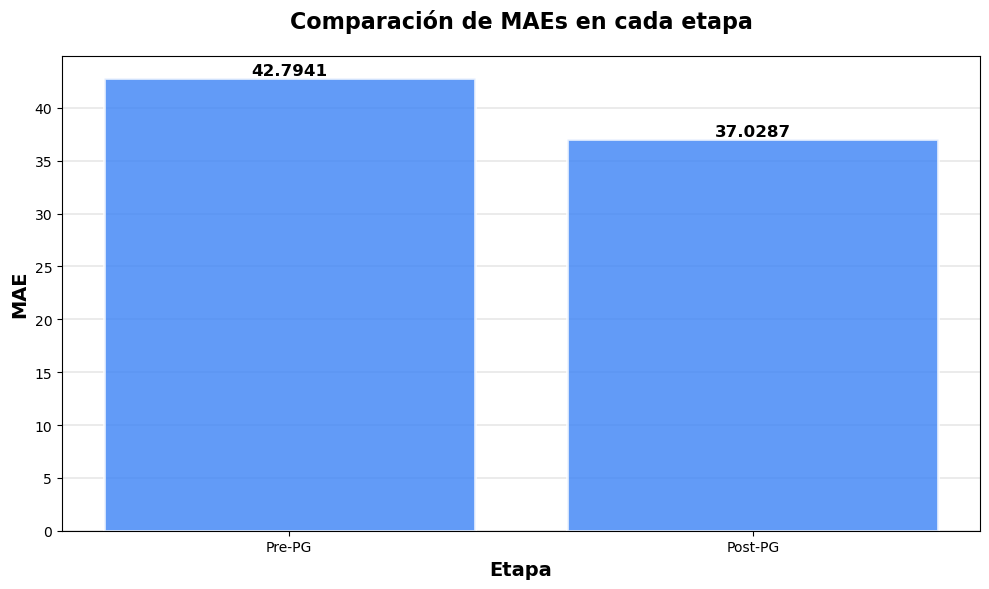

In [25]:
# Datos
pasos = ["Pre-PG", "Post-PG"]
maes = [mae_baseline, gp_model.best_individual.fitness.values[0]]
colores = ['#3B82F6', '#3B82F6']  # Azul

# Creación del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(pasos, maes, color=colores, alpha=0.8, 
              edgecolor='white', linewidth=2)

# Labels y título
ax.set_xlabel('Etapa', fontsize=14, fontweight='bold')
ax.set_ylabel('MAE', fontsize=14, fontweight='bold')
ax.set_title('Comparación de MAEs en cada etapa', 
             fontsize=16, fontweight='bold', pad=20)

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grid y estilo
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=1.2)
ax.set_axisbelow(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

## **4.2. Eliminación de atributos**
<a id="delete"></a>

Tras comprobar la mejora con la síntesis de atributos, es necesario observar si se puede mejorar los resultados obtenidos realizando una selección de atributos. Lo mejor para realizar esto es usar un **Algoritmo Genético**, mediante el cuál podemos seleccionar columnas a emplear en el entrenamiento. Para ello, los individuos son cadenas de bits de longitud igual al número de atributos del dataset original, que codifican si un atributo debe estar en el dataset modificado o no. De la misma manera que antes, se provee el siguiente código para importar las funciones y librerías necesarias:

In [ ]:
import random
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Ahora, se define una clase para entrenar las regresiones lineales con los datos modificados, es decir, aquellos que contienen las columnas seleccionadas por el algoritmo evolutivo. Este código se define en una clase que cuenta con los siguientes parámetros:

- **population_size**: tamaño de la población.
- **generations**: número de generaciones del algoritmo.
- **crossover_prob**: número que define la probabilidad de cruce.
- **mutation_prob**: número que define la probabilidad de mutación para cada individuo.
- **mutation_indpb**: número que define la probabilidad de mutación independiente para cada bit.
- **tournament_size**: número que define el tamaño de los torneos para realizar la selección para el cruzamiento.
- **test_size**: proporción de los datos que se usarán para la validación.
- **min_features**: número mínimo de atributos que se mantienen.
- **random_state**: semilla aleatoria.

Adicionalmente, se definen una serie de parámetros de la clase que se usan para el entrenamiento y que el usuario no puede definir. Tras esto, se definen una serie de funciones que se encargan de realizar el proceso de entrenamiento. Estas son:

- **_setup_deap**: inicializa todo aquello relacionado con el algoritmo de programación genética, como la función de evaluación (definida en otro método), los operadores genéticos (mutación, selección, sobrecruzamiento...), el torneo de selección. Los operadores genéticos escogidos son:
    - Sobrecruzamiento de dos puntos
    - Mutación a través de la negación de bits (bit flip)
    - Selección mediante torneo
- **_evaluate_individual**: esta es la función que se encarga de evaluar un individuo. En este caso, el individuo, definido como una cadena de bits, se aplica a cada instancia del dataset original generando uno nuevo con los atributos que el individuo escoge. Luego, se entrena una regresión lineal con los datos modificados, tras lo que se devuelve el MAE como resultado de la evaluación, siempre buscando minimizarlo. Aquellos individuos no válidos devuelven un MAE muy alto para no ser escogidos para la reproducción.
- **fit**: función que se encarga de inicializar la población, ejecutar el modelo de algoritmos evolutivos e imprimir los resultados del mejor individuo. 
- **transform**: función que se encarga de aplicar el mejor individuo (selección de atributos) a los datos para transformar el dataset.
- **fit_transform**: llama a fit y a transform de manera conjunta.
- **get_support**: función auxiliar que devuelve los atributos seleccionados.

Todo el código se ve reflejado en el siguiente bloque:

In [37]:
class GeneticFeatureSelector:

    # Función de inicialización
    def __init__(self, population_size=100, generations=50, crossover_prob=0.7, mutation_prob=0.2, mutation_indpb=0.05,
                 tournament_size=3, test_size=0.2, min_features=1, random_state=42):

        self.population_size = population_size
        self.generations = generations
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.mutation_indpb = mutation_indpb
        self.tournament_size = tournament_size
        self.test_size = test_size
        self.min_features = min_features
        self.random_state = random_state
        
        self.feature_names = None
        self.n_features = None
        self.toolbox = None
        self.best_individual = None
        self.selected_features = None
        self.hof = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
    def _setup_deap(self):
        
        # Limpiar creator si ya existe
        if hasattr(creator, "FitnessMin"):
            del creator.FitnessMin
        if hasattr(creator, "Individual"):
            del creator.Individual
        
        # Crear tipos
        # Fitness: minimizar MAE (weights=-1.0) y penalizar muchas features (weights=-0.01)
        creator.create("FitnessMin", base.Fitness, weights=(-1.0, -0.01))
        creator.create("Individual", list, fitness=creator.FitnessMin)
        
        # Configurar toolbox
        toolbox = base.Toolbox()
        
        # Generación de individuos: cadenas de bits aleatorias
        toolbox.register("attr_bool", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual,
                        toolbox.attr_bool, n=self.n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        
        # Función de evaluación
        toolbox.register("evaluate", self._evaluate_individual)
        
        # Operadores genéticos
        toolbox.register("mate", tools.cxTwoPoint)  # Cruce de dos puntos
        toolbox.register("mutate", tools.mutFlipBit, indpb=self.mutation_indpb)  # Flip bit
        toolbox.register("select", tools.selTournament, tournsize=self.tournament_size)
        
        return toolbox
    
    def _evaluate_individual(self, individual):

        # Decodificar: qué features están seleccionadas
        selected_indices = [i for i, bit in enumerate(individual) if bit == 1]
        
        # Validar que hay al menos min_features seleccionadas
        if len(selected_indices) < self.min_features:
            # Penalizar fuertemente individuos inválidos
            return (float('inf'), 1.0)
        
        try:
            # Seleccionar solo las columnas marcadas con 1
            selected_cols = [self.feature_names[i] for i in selected_indices]
            X_train_selected = self.X_train[selected_cols]
            X_test_selected = self.X_test[selected_cols]
            
            # Entrenar regresión lineal
            model = LinearRegression()
            model.fit(X_train_selected, self.y_train)
            
            # Predecir y calcular MAE
            y_pred = model.predict(X_test_selected)
            mae = mean_absolute_error(self.y_test, y_pred)
            
            # Segundo objetivo: proporción de features (para parsimonia)
            num_features_ratio = len(selected_indices) / self.n_features
            
            return (mae, num_features_ratio)
            
        except Exception as e:
            # Si hay cualquier error, devolver fitness muy malo
            return (float('inf'), 1.0)
    
    def fit(self, X, y):

        # Configurar semilla
        random.seed(self.random_state)
        np.random.seed(self.random_state)
        
        # Guardar nombres de features
        if isinstance(X, pd.DataFrame):
            self.feature_names = list(X.columns)
        else:
            X = pd.DataFrame(X)
            self.feature_names = [f'feature_{i}' for i in range(X.shape[1])]
            X.columns = self.feature_names
        
        self.n_features = len(self.feature_names)
        
        # Dividir en train/test para validación
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        
        print("=" * 70)
        print("CONFIGURACIÓN DEL SELECTOR DE FEATURES")
        print("=" * 70)
        print(f"Dimensiones del dataset:")
        print(f"  - Train: {self.X_train.shape}")
        print(f"  - Test: {self.X_test.shape}")
        print(f"  - Total de features: {self.n_features}")
        print(f"  - Features: {self.feature_names}")
        print()
        print(f"Parámetros del GA:")
        print(f"  - Población: {self.population_size}")
        print(f"  - Generaciones: {self.generations}")
        print(f"  - P(cruce): {self.crossover_prob}")
        print(f"  - P(mutación): {self.mutation_prob}")
        print(f"  - P(flip bit): {self.mutation_indpb}")
        print()
        
        # Configurar DEAP
        self.toolbox = self._setup_deap()
        
        # Crear población inicial
        pop = self.toolbox.population(n=self.population_size)
        
        # Hall of Fame: guardar los 5 mejores
        self.hof = tools.ParetoFront()  # Frente de Pareto para multi-objetivo
        
        # Estadísticas
        stats_fit = tools.Statistics(lambda ind: ind.fitness.values[0])  # MAE
        stats_size = tools.Statistics(lambda ind: sum(ind))  # Num features
        mstats = tools.MultiStatistics(mae=stats_fit, features=stats_size)
        mstats.register("avg", np.mean)
        mstats.register("std", np.std)
        mstats.register("min", np.min)
        mstats.register("max", np.max)
        
        print("=" * 70)
        print("INICIANDO BÚSQUEDA DE FEATURES ÓPTIMAS")
        print("=" * 70)
        
        # Ejecutar algoritmo genético
        pop, log = algorithms.eaSimple(
            pop, self.toolbox,
            cxpb=self.crossover_prob,
            mutpb=self.mutation_prob,
            ngen=self.generations,
            stats=mstats,
            halloffame=self.hof,
            verbose=True
        )
        
        # Seleccionar mejor individuo (menor MAE del frente de Pareto)
        self.best_individual = min(self.hof, key=lambda ind: ind.fitness.values[0])
        
        # Decodificar features seleccionadas
        selected_indices = [i for i, bit in enumerate(self.best_individual) if bit == 1]
        self.selected_features = [self.feature_names[i] for i in selected_indices]
        
        print("\n" + "=" * 70)
        print("SELECCIÓN COMPLETADA")
        print("=" * 70)
        print(f"\nMejor subconjunto encontrado:")
        print(f"  - MAE: {self.best_individual.fitness.values[0]:.6f}")
        print(f"  - Features seleccionadas: {len(self.selected_features)}/{self.n_features}")
        print(f"  - Proporción: {len(self.selected_features)/self.n_features*100:.1f}%")
        print(f"\nFeatures seleccionadas:")
        for i, feat in enumerate(self.selected_features, 1):
            print(f"  {i}. {feat}")
        
        print(f"\nCadena binaria del mejor individuo:")
        print(f"  {self.best_individual}")
        
        return self
    
    def transform(self, X):
        
        if self.selected_features is None:
            raise ValueError("El selector no ha sido entrenado. Llama a fit() primero.")
        
        return X[self.selected_features]
    
    def fit_transform(self, X, y):
        
        self.fit(X, y)
        return self.transform(X)
    
    def get_support(self, indices=False):
        
        if self.best_individual is None:
            raise ValueError("El selector no ha sido entrenado. Llama a fit() primero.")
        
        if indices:
            return [i for i, bit in enumerate(self.best_individual) if bit == 1]
        else:
            return np.array(self.best_individual, dtype=bool)

Aplicando este regresor a los datos explicados, se obtienen los siguientes resultados:

In [36]:
# Obtención de los datos
data = pd.read_csv("Diabetes.csv", sep=",")
Y = data[["target"]]
X = data.drop("target", axis="columns")
X = gp_model.transform(X)
    
# BASELINE: Regresión con todas las features partiendo del dataset modificado por la síntesis de atributos
print("\n" + "=" * 70)
print("BASELINE: REGRESIÓN LINEAL CON TODAS LAS FEATURES")
print("=" * 70)
X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
lr_baseline = LinearRegression()
lr_baseline.fit(X_train_bl, y_train_bl)
y_pred_baseline = lr_baseline.predict(X_test_bl)
mae_baseline = mean_absolute_error(y_test_bl, y_pred_baseline)
print(f"MAE con todas las features: {mae_baseline:.6f}")
print(f"Número de features usadas: {X.shape[1]}")

# SELECCIÓN DE FEATURES CON GA
print("\n" + "=" * 70)
print("SELECCIÓN DE FEATURES CON ALGORITMOS GENÉTICOS")
print("=" * 70)

selector = GeneticFeatureSelector(
    population_size=50,
    generations=100,
    crossover_prob=0.7,
    mutation_prob=0.2,
    mutation_indpb=0.1,
    min_features=1,
    random_state=42
)

selector.fit(X, Y)

# Transformar datos
X_selected = selector.transform(X)

# Evaluar con features seleccionadas
print("\n" + "=" * 70)
print("EVALUACIÓN CON FEATURES SELECCIONADAS")
print("=" * 70)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, Y, test_size=0.2, random_state=42
)
lr_selected = LinearRegression()
lr_selected.fit(X_train_sel, y_train_sel)
y_pred_selected = lr_selected.predict(X_test_sel)
mae_selected = mean_absolute_error(y_test_sel, y_pred_selected)

print(f"MAE con features seleccionadas: {mae_selected:.6f}")
print(f"Número de features usadas: {X_selected.shape[1]}")

# COMPARACIÓN FINAL
print("\n" + "=" * 70)
print("COMPARACIÓN FINAL")
print("=" * 70)
print(f"MAE Baseline (todas):      {mae_baseline:.6f} ({X.shape[1]} features)")
print(f"MAE Selección GA:          {mae_selected:.6f} ({X_selected.shape[1]} features)")
print(f"Reducción de features:     {X.shape[1] - X_selected.shape[1]} ({(1-X_selected.shape[1]/X.shape[1])*100:.1f}%)")

if mae_selected < mae_baseline:
    print(f"✓ Mejora en MAE:           {mae_baseline - mae_selected:.6f}")
else:
    print(f"✗ Empeoramiento en MAE:    {mae_selected - mae_baseline:.6f}")

print("\nDataset transformado (primeras filas):")
print(X_selected.head())


BASELINE: REGRESIÓN LINEAL CON TODAS LAS FEATURES
MAE con todas las features: 37.028716
Número de features usadas: 11

SELECCIÓN DE FEATURES CON ALGORITMOS GENÉTICOS
CONFIGURACIÓN DEL SELECTOR DE FEATURES
Dimensiones del dataset:
  - Train: (353, 11)
  - Test: (89, 11)
  - Total de features: 11
  - Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'gp_feature']

Parámetros del GA:
  - Población: 50
  - Generaciones: 100
  - P(cruce): 0.7
  - P(mutación): 0.2
  - P(flip bit): 0.1

INICIANDO BÚSQUEDA DE FEATURES ÓPTIMAS
   	      	                    features                   	                      mae                      
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg 	gen	max	min	nevals	std    	avg    	gen	max    	min    	nevals	std    
0  	50    	5.22	0  	8  	1  	50    	1.93173	47.4605	0  	62.0318	42.6653	50    	3.88907
1  	34    	5.48	1  	9  	1  	34    	1.87872	44.8135	1  	52.053 	42

Como se puede observar, el cambio no es tan significativo tras la síntesis de atributos. El individuo con menor MAE tan sólo elimina un atributo, `s4`, consiguiendo una mejora despreciable. Esto se puede observar gráficamente en la siguiente figura:

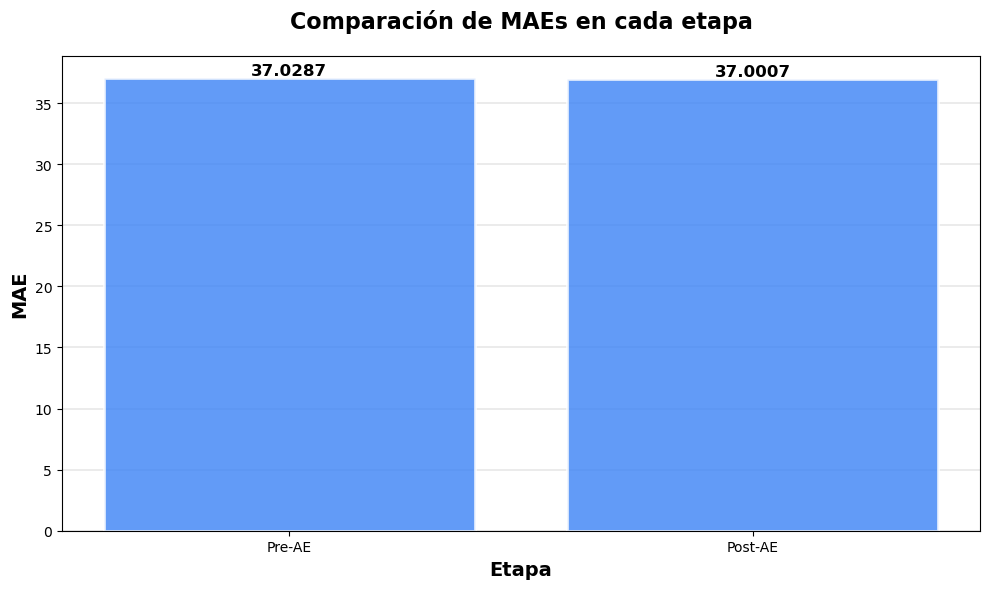

In [38]:
# Datos
pasos = ["Pre-AE", "Post-AE"]
maes = [mae_baseline, mae_selected]
colores = ['#3B82F6', '#3B82F6']  # Azul

# Creación del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(pasos, maes, color=colores, alpha=0.8, 
              edgecolor='white', linewidth=2)

# Labels y título
ax.set_xlabel('Etapa', fontsize=14, fontweight='bold')
ax.set_ylabel('MAE', fontsize=14, fontweight='bold')
ax.set_title('Comparación de MAEs en cada etapa', 
             fontsize=16, fontweight='bold', pad=20)

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grid y estilo
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=1.2)
ax.set_axisbelow(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

# **5. Resultados**
<a id="results"></a>

# **6. Conclusiones**
<a id="conclusion"></a>

# **TODO**

- Poner operadores genéticos de GP